# Detect text with easycor

## 0. Setting Env

In [2]:
!pip install easyocr Pillow numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 34.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 6.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 25.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━

## 1. easyocr code

In [3]:
import io
import boto3
import easyocr
import numpy as np
from PIL import Image

# 필요한 경우 설치: !pip install easyocr

def detect_text_in_image(bucket, key, target_languages):
    # boto3 S3 클라이언트 초기화
    s3_client = boto3.client('s3')

    # S3 버킷에서 이미지 객체 가져오기
    image_obj = s3_client.get_object(Bucket=bucket, Key=key)
    image_content = image_obj['Body'].read()

    # 이미지를 numpy 배열로 변환
    image = Image.open(io.BytesIO(image_content))
    image_np = np.array(image)

    # EasyOCR reader 초기화
    reader = easyocr.Reader(
        target_languages,
        model_storage_directory='/tmp',
        user_network_directory='/tmp',
        download_enabled=True,
        gpu=False  # SageMaker 노트북 인스턴스의 GPU 사용 여부에 따라 변경
    )

    # 이미지에서 텍스트 감지
    results = reader.readtext(image_np)

    # 감지된 텍스트 및 위치 정보 추출
    detected_texts = []
    positions = []
    for result in results:
        text = result[1]
        detected_texts.append(text)

        position = result[0]
        positions.append({
            "Text": text,
            "Position": position  # 위치 정보를 좀 더 간단하게 저장
        })

    detected_texts_join = ' '.join(detected_texts)

    return {
        'DetectedText': detected_texts_join,
        'DetectedResults': positions
    }




## 2. 테스트

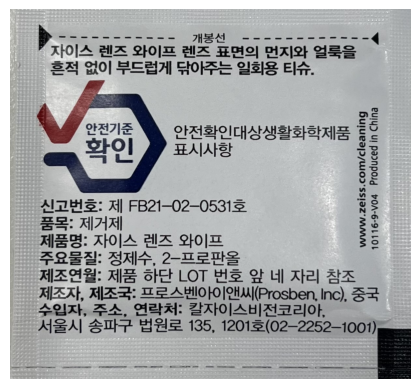

Using CPU. Note: This module is much faster with a GPU.


{'DetectedText': '개봉선 자이스 렌즈 와이프 렌즈 표면의 먼지와 얼륙올 흔적 없이 부드럽게 닦아주는 일회용 티슈 안전기준 안전확인대상생활화학제품 틀 드 확인 표시사항 l 신고번호: 제 FB21-02-0531호 품목: 제거제  제품명: 자이스 렌즈 와이프 주요물질: 정제수, 2-프로판올 제조연월: 제품 하단 LOT 번호 앞 네 자리 참조 제조자 제조국: 프로스벤아이언쓰Prosben Inc) 중국 수입자, 주소, 연락처: 갈자이스비전코리아 서울시 승파구 법원로 135, 1201호(02-2252-1001)', 'DetectedResults': [{'Text': '개봉선', 'Position': [[553, 67], [663, 67], [663, 111], [553, 111]]}, {'Text': '자이스 렌즈 와이프 렌즈 표면의 먼지와 얼륙올', 'Position': [[117, 101], [1067, 101], [1067, 163], [117, 163]]}, {'Text': '흔적 없이 부드럽게 닦아주는 일회용 티슈', 'Position': [[121, 151], [935, 151], [935, 213], [121, 213]]}, {'Text': '안전기준', 'Position': [[228, 342], [384, 342], [384, 396], [228, 396]]}, {'Text': '안전확인대상생활화학제품', 'Position': [[496, 346], [1051, 346], [1051, 414], [496, 414]]}, {'Text': '틀', 'Position': [[1095, 297], [1133, 297], [1133, 381], [1095, 381]]}, {'Text': '드', 'Position': [[1098, 382], [1130, 382], [1130, 414], [1098, 414]]}, {'Text': '확인', 'Position': [[222, 386], [388, 386], [388, 486], [222, 486]]},

In [9]:
import boto3
from PIL import Image
import io
import matplotlib.pyplot as plt

# boto3 S3 클라이언트 초기화
s3 = boto3.client('s3')

# S3 버킷에 500KB 미만 이미지를 미리 업로드 해두었음
bucket = 'detect-text-jesamkim-240226'
key = 'test.jpeg'
target_languages = ['en', 'ko']  # 지원되는 언어 코드 목록


# S3 버킷에서 이미지 객체 가져오기 
image_obj = s3.get_object(Bucket=bucket, Key=key)
image_content = image_obj['Body'].read()

# 이미지를 BytesIO 스트림으로 변환하고 이미지 표시
image = Image.open(io.BytesIO(image_content))
plt.imshow(image)
plt.axis('off')
plt.show()


# easyocr 모델 결과
result = detect_text_in_image(bucket, key, target_languages)
print(result)